# Step 1 and 2:


Install the scikit-learn library.
Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import data

In [3]:
path = r'C:\Users\Jenna\Desktop\Data Course\Part 6\DATA'

In [4]:
df= pd.read_csv(os.path.join(path, 'NEW_CA_data.csv'), index_col = 0)

In [5]:
df.head()

,Census Tract,Total Population,California County,County,countytrim,ZIP,Longitude,Latitude,Ozone,PM2.5,...,Imp. Water Bodies,Solid Waste,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden
0,6019001100,3174,Fresno,Fresno County,Fresno,93706,-119.781696,36.709695,0.065,15.40,...,0,21.75,131.64,7.44,14.13,53.3,16.2,76.3,17.6,26.0
1,6071001600,6133,San Bernardino,San Bernardino County,San Bernardino,91761,-117.618013,34.057780,0.062,13.31,...,5,12.00,60.66,7.04,12.94,53.3,33.4,72.5,12.3,34.1
2,6019000200,3167,Fresno,Fresno County,Fresno,93706,-119.805504,36.735491,0.062,15.40,...,0,2.50,142.12,10.16,14.96,42.3,16.7,86.8,16.1,40.1
3,6077000801,6692,San Joaquin,San Joaquin County,San Joaquin,95203,-121.314524,37.940517,0.046,12.54,...,19,27.00,142.17,6.23,14.72,40.8,15.3,61.3,19.6,21.1
4,6019001500,2206,Fresno,Fresno County,Fresno,93725,-119.717843,36.681600,0.065,15.40,...,0,50.80,90.48,4.50,12.82,45.1,14.7,66.4,18.6,28.1


# Step 3: Clean your data so that it’s ready for analysis.


The regression cannot be done with Nan values, so I will use a subset that drops missing values for poverty and cardiovascular disease

In [7]:
df_2 = df.dropna(subset=['Poverty', 'Cardiovascular Disease'])

# Step 4: Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

After looking at the pair plot in exercise 6.2, I will use Poverty and Cardiovascular disease for this regression.




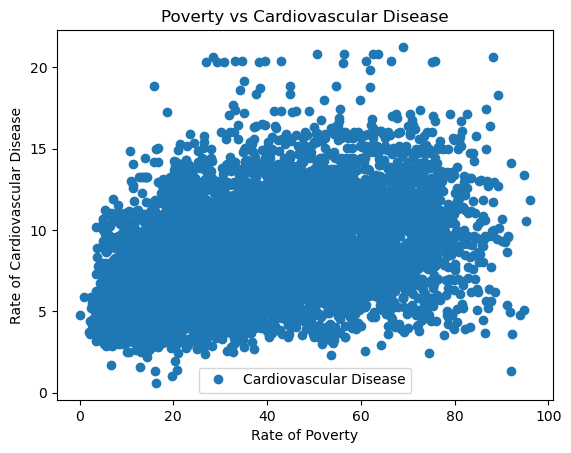

In [9]:
df_2.plot(x = 'Poverty', y='Cardiovascular Disease',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Poverty vs Cardiovascular Disease')
plt.xlabel('Rate of Poverty')
plt.ylabel('Rate of Cardiovascular Disease')
plt.show()

# Step 5: State your hypothesis in a markdown cell within your Jupyter notebook.

HYPOTHESIS:     

If an area has higher rates of poverty, there will be a higher rate of cardiovascular disease.

# Step 6: Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [17]:
# Reshape the variables into array 

X = df_2['Poverty'].values.reshape(-1,1) # Capitol x for independent variable
y = df_2['Asthma'].values.reshape(-1,1) # y for dependent variable

In [18]:
# Check the X array
X

array([[76.3],
       [72.5],
       [86.8],
       ...,
       [24.7],
       [21. ],
       [29. ]])

In [19]:
# check y array

y

array([[131.64],
       [ 60.66],
       [142.12],
       ...,
       [ 40.43],
       [ 88.35],
       [ 11.8 ]])

# Step 7: Split the data into two sets: a training set and a test set.

In [20]:
# split data into training and test set using the train_test_split function from scikit learn

# the function randomly shuffles data and splits it
# the variables store the training and testing data based on the split
# test size 0.3 means that 30% of the data is used for testing, the other 70% used for training
# random_state is any number that when used again we reproduce the same results (random seed concept)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 8: Run a linear regression on the data.   
First, fit the model you created to the training set.   
Then, create a prediction for y on the test set.   

In [21]:
# set a regression object to fit onto the training data

regression = LinearRegression() 

In [22]:
# Fit (train) the regression object with the training set

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# set y predicted as the values of y predicted using the trained model and the x variable

y_predicted = regression.predict(X_test)

# Step 9: Create a plot that shows the regression line on the test set.

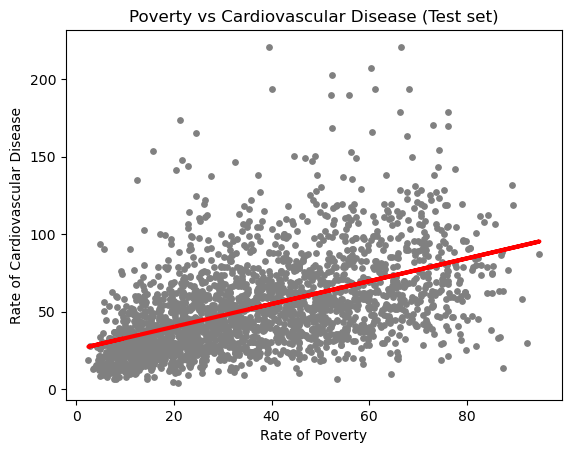

In [25]:
# Create a plot that shows the regression line from the model on the test set.
# this shows the gray values as the actual test set and the red line as the prediction based on the model

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Poverty vs Cardiovascular Disease (Test set)')
plt.xlabel('Rate of Poverty')
plt.ylabel('Rate of Cardiovascular Disease')
plot_test.show()

# Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The line does seem to follow a general trend in the data, however there are a lot of data points that would not be accurately predicted by this model.

# Step 11: Check the model performance statistics—MSE and R2 score.

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error between the test and the predicted values
r2 = r2_score(y_test, y_predicted) # This is the R2 score between the test and the predicted values

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_) 
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.73582749]]
Mean squared error:  665.2675862114726
R2 score:  0.24438867790902896


## Step 11:

Slope: [[0.73582749]]   

This is a positive slope which indicates that according to this model, as poverty increases, cv disease increases by a degree of 0.735

Mean squared error:  665.2675862114726    

A lower rmse value is better, this one is quite high indicating that there are many values that deviate quite a bit from the estimated values.

R2 score:  0.24438867790902896    
 
The R2 score is pretty low, meaning that only 24% of the values follow the trend predicted by this model


# Step 12: Compare the predicted y values with the actual y values in a dataframe.

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,93.59,51.797031
1,36.95,73.136028
2,45.71,46.057576
3,21.37,47.823562
4,56.29,64.379681
5,31.55,35.903157
6,32.81,60.479795
7,23.12,34.799416
8,90.02,48.632972
9,88.42,80.494303


# Step 13: Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

The rate of cardiovascular disease in a community is very complicated and cannot be explained by one varible alone. Although poverty may contribute to higher rates due to lack of consistent health care or access to higher quality foods, there are many other factors involved. This line up with the models performance. The model indicates that there may be a positive relationship between poverty and cv disease, but rate of poverty is not enough to accurately predict the rate of disease in a community.


# Check the performance on the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:

print('Slope:' ,regression.coef_) 
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.73582749]]
Mean squared error:  724.5809543443679
R2 score:  0.23537347513832652


### The model performs only slightly better on the training set, confirming that there is not a strong enough relationship between the variables to accurately predict 